In [73]:
# Import the module
import os
import json
import pandas as pd
import sentiment_filter as s
import matplotlib.pyplot as plt
import re
import time
from tqdm import tqdm
from datetime import datetime


path = 'C:/Users/Peter/Documents/GitHub/temporary_worktable/dan_chat/'
os.chdir(path)

# string_filename = "result.json"


In [38]:
# path = 'C:/Users/Peter/Documents/SentimentFilter-master'
# os.chdir(path)
# !pip install .


^C


In [42]:
file = open("result.json",encoding="utf8")
data_raw = json.load(file)


In [43]:
data_raw

{'name': 'Данила Михайлович',
 'type': 'personal_chat',
 'id': 44373171,
 'messages': [{'id': 1,
   'type': 'message',
   'date': '2016-08-31T08:14:47',
   'date_unixtime': '1472620487',
   'from': 'Данила Михайлович Антипин',
   'from_id': 'user44373171',
   'text': 'лучше б рассказ выложил',
   'text_entities': [{'type': 'plain', 'text': 'лучше б рассказ выложил'}]},
  {'id': 2,
   'type': 'message',
   'date': '2016-08-31T08:19:12',
   'date_unixtime': '1472620752',
   'from': 'P O',
   'from_id': 'user232351583',
   'text': 'Хмм',
   'text_entities': [{'type': 'plain', 'text': 'Хмм'}]},
  {'id': 19,
   'type': 'message',
   'date': '2016-11-23T22:24:25',
   'date_unixtime': '1479929065',
   'from': 'P O',
   'from_id': 'user232351583',
   'file': '(File not included. Change data exporting settings to download.)',
   'thumbnail': '(File not included. Change data exporting settings to download.)',
   'mime_type': 'image/jpeg',
   'width': 3264,
   'height': 2448,
   'text': '',
   't

In [44]:
df = pd.DataFrame(data_raw)

In [118]:
# df

In [46]:
# df = df[:1000]

In [47]:
df = df.drop(['name','type','id'],axis=1)

In [48]:
df = pd.concat([df.drop('messages', axis=1), df['messages'].apply(pd.Series)], axis=1)

In [49]:
df

id     type                 date date_unixtime  \
0          1  message  2016-08-31T08:14:47    1472620487   
1          2  message  2016-08-31T08:19:12    1472620752   
2         19  message  2016-11-23T22:24:25    1479929065   
3         20  message  2016-11-23T22:24:48    1479929088   
4         21  message  2016-11-23T22:25:43    1479929143   
...      ...      ...                  ...           ...   
31133  81205  message  2023-02-14T15:35:49    1676378149   
31134  81232  message  2023-02-14T20:25:46    1676395546   
31135  81235  message  2023-02-14T20:32:36    1676395956   
31136  81237  message  2023-02-14T20:33:47    1676396027   
31137  81238  message  2023-02-14T20:33:57    1676396037   

                            from        from_id  \
0      Данила Михайлович Антипин   user44373171   
1                            P O  user232351583   
2                            P O  user232351583   
3                            P O  user232351583   
4      Данила Михайлович Антипин   user44373171   
...                          ...            ...   
31133                        P O  user232351583   
31134                        P O  user232351583   
31135  Данила Михайлович Антипин   user44373171   
31136                        P O  user232351583   
31137                        P O  user232351583   

                                      text  \
0                  лучше б рассказ выложил   
1                                      Хмм   
2                                            
3                      Как будто ты гигант   
4                                прикольно   
...                                    ...   
31133                                  неа   
31134                                        
31135                                   ))   
31136  Эта объява при входе в школу танцев   
31137            Ходил на занятие по танго   

                                           text_entities  \
0      [{'type': 'plain', 'text': 'лучше б рассказ вы...   
1                     [{'type': 'plain', 'text': 'Хмм'}]   
2                                                     []   
3      [{'type': 'plain', 'text': 'Как будто ты гиган...   
4               [{'type': 'plain', 'text': 'прикольно'}]   
...                                                  ...   
31133                 [{'type': 'plain', 'text': 'неа'}]   
31134                                                 []   
31135                  [{'type': 'plain', 'text': '))'}]   
31136  [{'type': 'plain', 'text': 'Эта объява при вхо...   
31137  [{'type': 'plain', 'text': 'Ходил на занятие п...   

                                                    file  \
0                                                    NaN   
1                                                    NaN   
2      (File not included. Change data exporting sett...   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
31133                                                NaN   
31134                                                NaN   
31135                                                NaN   
31136                                                NaN   
31137                                                NaN   

                                               thumbnail  ... edited  \
0                                                    NaN  ...    NaN   
1                                                    NaN  ...    NaN   
2      (File not included. Change data exporting sett...  ...    NaN   
3                                                    NaN  ...    NaN   
4                                                    NaN  ...    NaN   
...                                                  ...  ...    ...   
31133                                                NaN  ...    NaN   
31134                                                NaN  ...    NaN   
31135                            

In [50]:
df = df.drop(['date_unixtime','poll','self_destruct_period_seconds','location_information',
              'contact_vcard','contact_information','text_entities','file',
              'thumbnail','via_bot','discard_reason','edited','edited',
              'mime_type','width','height','media_type','photo','duration_seconds',
              'edited_unixtime','performer','title',
              'reply_to_message_id','actor','actor_id','action','from_id'],axis=1)

In [51]:
# df = df.drop(['date_unixtime','text_entities','file',
#               'thumbnail','discard_reason','edited','edited','width','height','media_type','photo','duration_seconds',
#               'edited_unixtime','reply_to_message_id','actor','actor_id','action','from_id'],axis=1)

In [52]:
df.columns

Index(['id', 'type', 'date', 'from', 'text', 'sticker_emoji',
       'forwarded_from'],
      dtype='object')

In [53]:
# parse the datetime string column into a datetime object
df['datetime'] = pd.to_datetime(df['date'])

# create separate columns for date and hour
df['date'] = df['datetime'].dt.date
df['hour'] = df['datetime'].dt.hour



# drop the original datetime string and datetime columns
df = df.drop(['datetime'], axis=1)
df

id     type        date                       from  \
0          1  message  2016-08-31  Данила Михайлович Антипин   
1          2  message  2016-08-31                        P O   
2         19  message  2016-11-23                        P O   
3         20  message  2016-11-23                        P O   
4         21  message  2016-11-23  Данила Михайлович Антипин   
...      ...      ...         ...                        ...   
31133  81205  message  2023-02-14                        P O   
31134  81232  message  2023-02-14                        P O   
31135  81235  message  2023-02-14  Данила Михайлович Антипин   
31136  81237  message  2023-02-14                        P O   
31137  81238  message  2023-02-14                        P O   

                                      text sticker_emoji forwarded_from  hour  
0                  лучше б рассказ выложил           NaN            NaN     8  
1                                      Хмм           NaN            NaN     8  
2                                                    NaN            NaN    22  
3                      Как будто ты гигант           NaN            NaN    22  
4                                прикольно           NaN            NaN    22  
...                                    ...           ...            ...   ...  
31133                                  неа           NaN            NaN    15  
31134                                                NaN            NaN    20  
31135                                   ))           NaN            NaN    20  
31136  Эта объява при входе в школу танцев           NaN            NaN    20  
31137            Ходил на занятие по танго           NaN            NaN    20  

[31138 rows x 8 columns]

In [54]:
df_new = df.copy(deep=True)
# df_new = df_new[:1000]

In [55]:
df_new.drop(['type','id',],axis=1)

date                       from  \
0      2016-08-31  Данила Михайлович Антипин   
1      2016-08-31                        P O   
2      2016-11-23                        P O   
3      2016-11-23                        P O   
4      2016-11-23  Данила Михайлович Антипин   
...           ...                        ...   
31133  2023-02-14                        P O   
31134  2023-02-14                        P O   
31135  2023-02-14  Данила Михайлович Антипин   
31136  2023-02-14                        P O   
31137  2023-02-14                        P O   

                                      text sticker_emoji forwarded_from  hour  
0                  лучше б рассказ выложил           NaN            NaN     8  
1                                      Хмм           NaN            NaN     8  
2                                                    NaN            NaN    22  
3                      Как будто ты гигант           NaN            NaN    22  
4                                прикольно           NaN            NaN    22  
...                                    ...           ...            ...   ...  
31133                                  неа           NaN            NaN    15  
31134                                                NaN            NaN    20  
31135                                   ))           NaN            NaN    20  
31136  Эта объява при входе в школу танцев           NaN            NaN    20  
31137            Ходил на занятие по танго           NaN            NaN    20  

[31138 rows x 6 columns]

In [56]:
df_new['count'] = 1
df_new['from'] = df_new['from'].replace({'Данила Михайлович Антипин': 'D', 'P O': 'P'})

df_new['sticker_emoji'] = df_new['sticker_emoji'].fillna('0')
df_new['forwarded_from'] = df_new['forwarded_from'].fillna('0')
df_new.loc[df_new['sticker_emoji'] != '0', 'sticker_emoji'] = 1
df_new.loc[df_new['forwarded_from'] != '0', 'forwarded_from'] = 1

df_new

id     type        date from                                 text  \
0          1  message  2016-08-31    D              лучше б рассказ выложил   
1          2  message  2016-08-31    P                                  Хмм   
2         19  message  2016-11-23    P                                        
3         20  message  2016-11-23    P                  Как будто ты гигант   
4         21  message  2016-11-23    D                            прикольно   
...      ...      ...         ...  ...                                  ...   
31133  81205  message  2023-02-14    P                                  неа   
31134  81232  message  2023-02-14    P                                        
31135  81235  message  2023-02-14    D                                   ))   
31136  81237  message  2023-02-14    P  Эта объява при входе в школу танцев   
31137  81238  message  2023-02-14    P            Ходил на занятие по танго   

      sticker_emoji forwarded_from  hour  count  
0                 0              0     8      1  
1                 0              0     8      1  
2                 0              0    22      1  
3                 0              0    22      1  
4                 0              0    22      1  
...             ...            ...   ...    ...  
31133             0              0    15      1  
31134             0              0    20      1  
31135             0              0    20      1  
31136             0              0    20      1  
31137             0              0    20      1  

[31138 rows x 9 columns]

In [57]:
# df_new = df_new[:100]

In [58]:
sentiment = s.SentimentFilter()

df_new['sent'] = tqdm(df_new['text'].apply(lambda x: sentiment.get_analysis(x)))
df_new['sent_res'] = tqdm(df_new['sent'].apply(lambda x: x['result'].name))

1/1 [==============================] - 0s 26ms/step


100%|██████████| 31138/31138 [00:00<00:00, 2413197.30it/s]


In [36]:
# from tqdm.notebook import tqdm
# sentiment = s.SentimentFilter()
# df_new['sent'] = df_new['text'].apply(lambda x: sentiment.get_analysis(x))
# df_new['sent_res'] = tqdm(df_new['sent'].apply(lambda x: x['result'].name))

1/1 [==============================] - 0s 22ms/step


C:\Users\Peter\AppData\Local\Temp\ipykernel_11576\3158087200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['sent'] = df_new['text'].apply(lambda x: sentiment.get_analysis(x))


  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\Peter\AppData\Local\Temp\ipykernel_11576\3158087200.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['sent_res'] = tqdm(df_new['sent'].apply(lambda x: x['result'].name))


In [64]:
df_new.to_csv('df_with_sent.csv',encoding='utf-8', index=False)

In [69]:
df_new[(df_new['from']=='D') & (df_new['sent_res']=='POSITIVE')]

id     type        date from  \
0          1  message  2016-08-31    D   
4         21  message  2016-11-23    D   
5         22  message  2016-11-23    D   
6         23  message  2016-11-23    D   
14       122  message  2016-12-24    D   
...      ...      ...         ...  ...   
31123  81193  message  2023-02-14    D   
31125  81195  message  2023-02-14    D   
31129  81201  message  2023-02-14    D   
31130  81202  message  2023-02-14    D   
31131  81203  message  2023-02-14    D   

                                                    text sticker_emoji  \
0                                лучше б рассказ выложил             0   
4                                              прикольно             0   
5                                   надо бы кросы помыть             0   
6                                            как тиндр?)             0   
14                                               классно             0   
...                                                  ...           ...   
31123                                 это не оч ворк кмк             0   
31125  нет, я отрицаю возможность того, что ты можешь...             0   
31129                                   учусь любить чай             0   
31130             я до анатолии добрался вот ток наконец             0   
31131                                а тут очень неплохо             0   

      forwarded_from  hour  count  \
0                  0     8      1   
4                  0    22      1   
5                  0    22      1   
6                  0    22      1   
14                 0    14      1   
...              ...   ...    ...   
31123              0    11      1   
31125              0    11      1   
31129              0    14      1   
31130              0    15      1   
31131              0    15      1   

                                                 sent  sent_res  
0      {'result': Sentiment.POSITIVE, 'score': 0.148}  POSITIVE  
4      {'result': Sentiment.POSITIVE, 'score': 0.175}  POSITIVE  
5      {'result': Sentiment.POSITIVE, 'score': 0.287}  POSITIVE  
6       {'result': Sentiment.POSITIVE, 'score': 0.17}  POSITIVE  
14     {'result': Sentiment.POSITIVE, 'score': 0.217}  POSITIVE  
...                                               ...       ...  
31123  {'result': Sentiment.POSITIVE, 'score': 0.175}  POSITIVE  
31125  {'result': Sentiment.POSITIVE, 'score': 0.052}  POSITIVE  
31129  {'result': Sentiment.POSITIVE, 'score': 0.421}  POSITIVE  
31130  {'result': Sentiment.POSITIVE, 'score': 0.059}  POSITIVE  
31131  {'result': Sentiment.POSITIVE, 'score': 0.026}  POSITIVE  

[7622 rows x 11 columns]

In [97]:
df_dan = df_new[df_new['from']=='D']
df_pet = df_new[df_new['from']=='P']

one_hot = pd.get_dummies(df_dan['sent_res'])
one_hot_p = pd.get_dummies(df_pet['sent_res'])



# concatenate the one-hot encoded dataframe with the original dataframe
df_dan = pd.concat([df_dan, one_hot], axis=1)
df_pet = pd.concat([df_pet, one_hot_p], axis=1)

df_dan

id     type        date from  \
0          1  message  2016-08-31    D   
4         21  message  2016-11-23    D   
5         22  message  2016-11-23    D   
6         23  message  2016-11-23    D   
7         25  message  2016-11-23    D   
...      ...      ...         ...  ...   
31129  81201  message  2023-02-14    D   
31130  81202  message  2023-02-14    D   
31131  81203  message  2023-02-14    D   
31132  81204  message  2023-02-14    D   
31135  81235  message  2023-02-14    D   

                                         text sticker_emoji forwarded_from  \
0                     лучше б рассказ выложил             0              0   
4                                   прикольно             0              0   
5                        надо бы кросы помыть             0              0   
6                                 как тиндр?)             0              0   
7                            ни одного лайка?             0              0   
...                                       ...           ...            ...   
31129                        учусь любить чай             0              0   
31130  я до анатолии добрался вот ток наконец             0              0   
31131                     а тут очень неплохо             0              0   
31132                                 ты был?             0              0   
31135                                      ))             0              0   

       hour  count                                            sent  sent_res  \
0         8      1  {'result': Sentiment.POSITIVE, 'score': 0.148}  POSITIVE   
4        22      1  {'result': Sentiment.POSITIVE, 'score': 0.175}  POSITIVE   
5        22      1  {'result': Sentiment.POSITIVE, 'score': 0.287}  POSITIVE   
6        22      1   {'result': Sentiment.POSITIVE, 'score': 0.17}  POSITIVE   
7        22      1  {'result': Sentiment.NEGATIVE, 'score': 0.779}  NEGATIVE   
...     ...    ...                                             ...       ...   
31129    14      1  {'result': Sentiment.POSITIVE, 'score': 0.421}  POSITIVE   
31130    15      1  {'result': Sentiment.POSITIVE, 'score': 0.059}  POSITIVE   
31131    15      1  {'result': Sentiment.POSITIVE, 'score': 0.026}  POSITIVE   
31132    15      1   {'result': Sentiment.NEUTRAL, 'score': 0.538}   NEUTRAL   
31135    20      1   {'result': Sentiment.NEUTRAL, 'score': 0.498}   NEUTRAL   

       NEGATIVE  NEUTRAL  POSITIVE  
0             0        0         1  
4             0        0         1  
5             0        0         1  
6             0        0         1  
7             1        0         0  
...         ...      ...       ...  
31129         0        0         1  
31130         0        0         1  
31131         0        0         1  
31132         0        1         0  
31135         0        1         0  

[15335 rows x 14 columns]

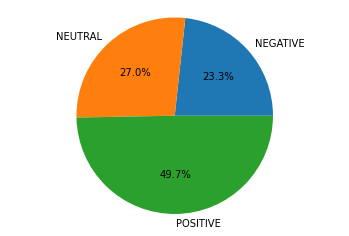

In [96]:
# create data
data = [df_dan['NEGATIVE'].sum(), df_dan['NEUTRAL'].sum(),df_dan['POSITIVE'].sum()]

# create labels
labels = ['NEGATIVE', 'NEUTRAL','POSITIVE']

# plot pie chart
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

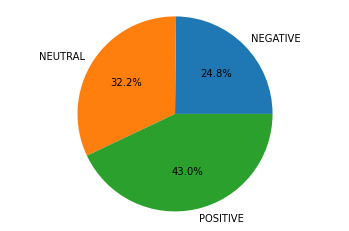

In [98]:
# create data
data = [df_pet['NEGATIVE'].sum(), df_pet['NEUTRAL'].sum(),df_pet['POSITIVE'].sum()]

# create labels
labels = ['NEGATIVE', 'NEUTRAL','POSITIVE']

# plot pie chart
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [ ]:
import pandas as pd


# # create a sample DataFrame with datetime index and message column
# date_rng = pd.date_range(start='1/1/2021', end='1/10/2021', freq='H')
# df = pd.DataFrame(date_rng, columns=['date'])
# df['messages'] = [i**2 for i in range(len(date_rng))]

# set the datetime column as index
df_new.set_index('date', inplace=True)
df_new.index = pd.to_datetime(df_new.index)


KeyError: "None of ['date'] are in the columns"

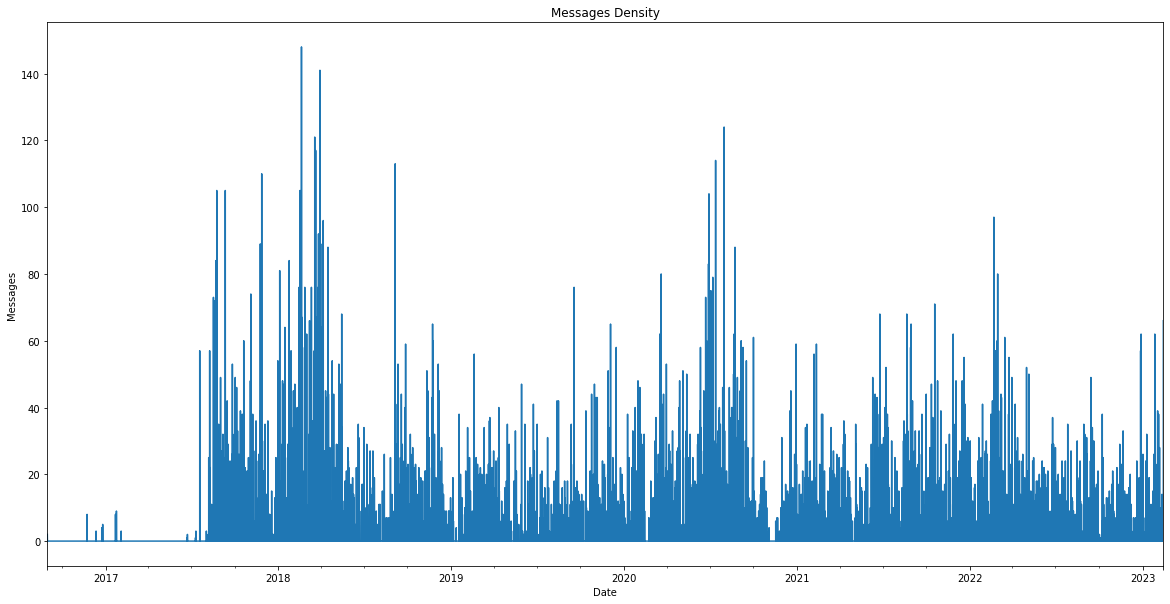

In [101]:
# resample the messages by hour and calculate the sum
df_daily = df_new['count'].resample('H').sum()

# plot the messages density
fig, ax = plt.subplots(figsize=(20, 10))
# fig = plt.figure(figsize=(10, 6))
df_daily.plot(kind='line', ax=ax)


# set the plot title and axis labels
ax.set_title('Messages Density')
ax.set_xlabel('Date')
ax.set_ylabel('Messages')


plt.show()

In [102]:
def period_plot(start_date,end_date,plot_title):
    # slice the DataFrame with a date range
    df_slice = df_new.loc[start_date:end_date]

    df_slice = df_slice['count'].resample('H').sum()

    # plot the messages density
    fig, ax = plt.subplots(figsize=(20, 10))
    # fig = plt.figure(figsize=(10, 6))
    df_slice.plot(kind='line', ax=ax)

    # set the plot title and axis labels
    ax.set_title('Messages Density')
    ax.set_xlabel('Date')
    ax.set_ylabel('Messages')
    plt.title(plot_title)

    return plt.show()

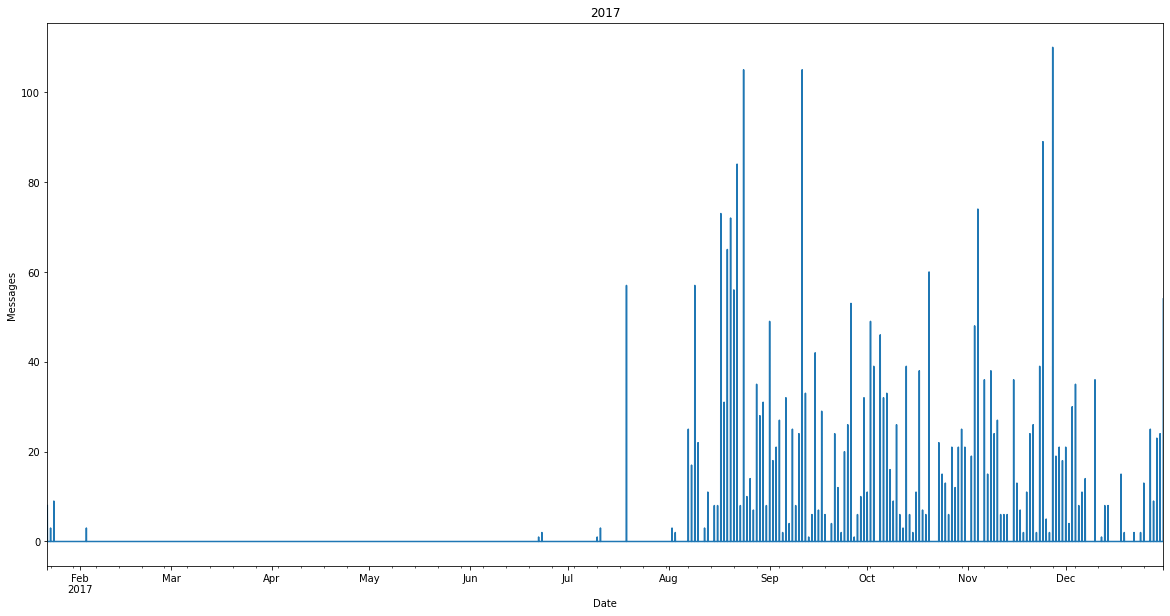

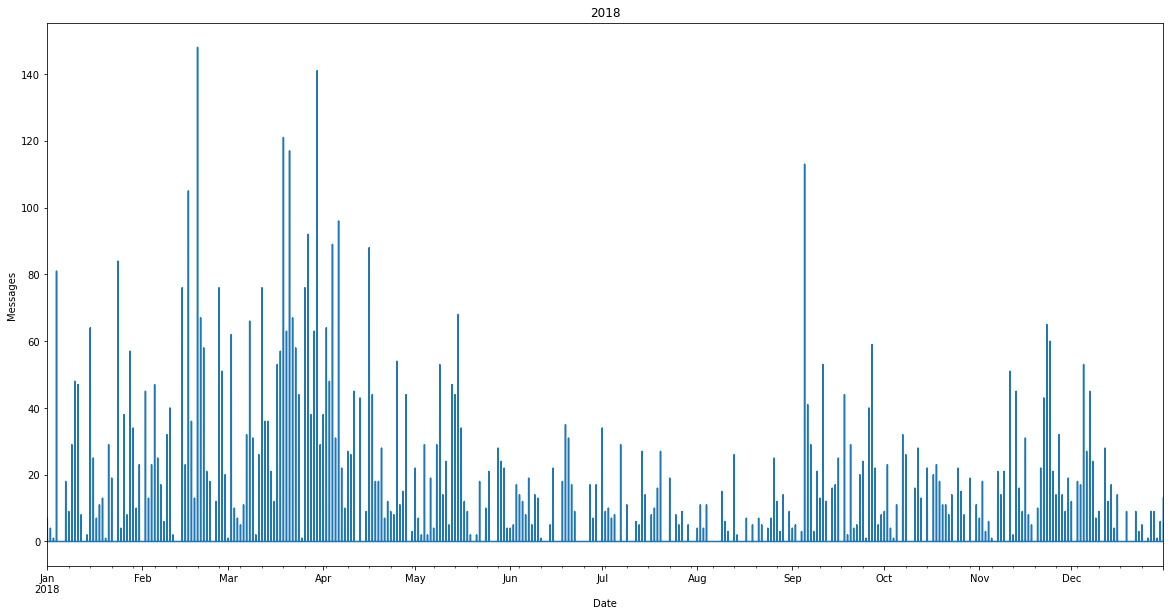

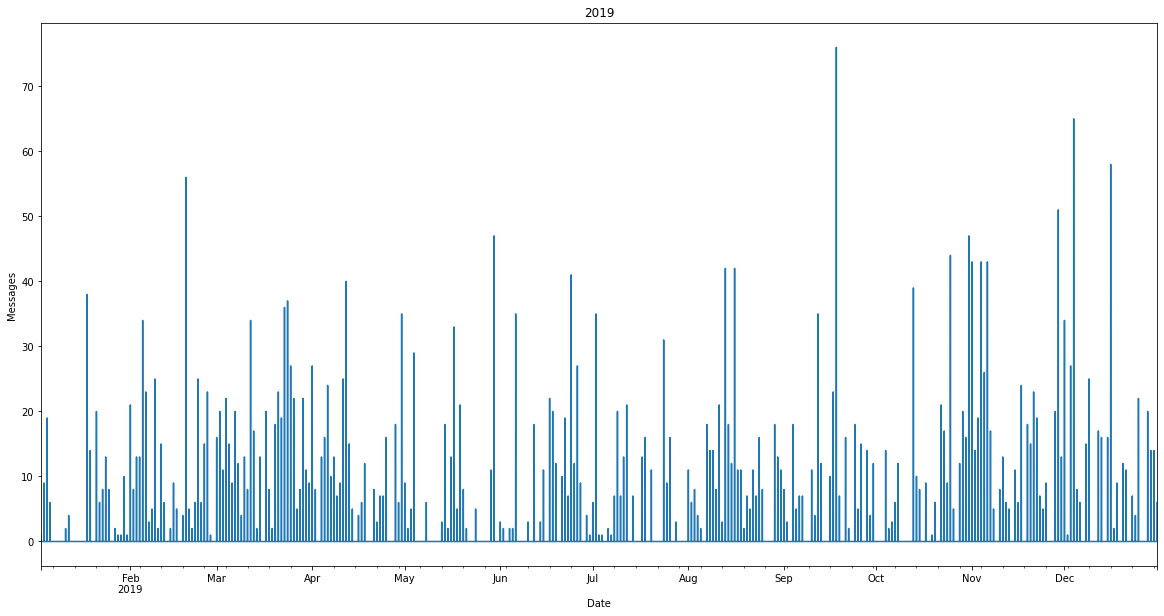

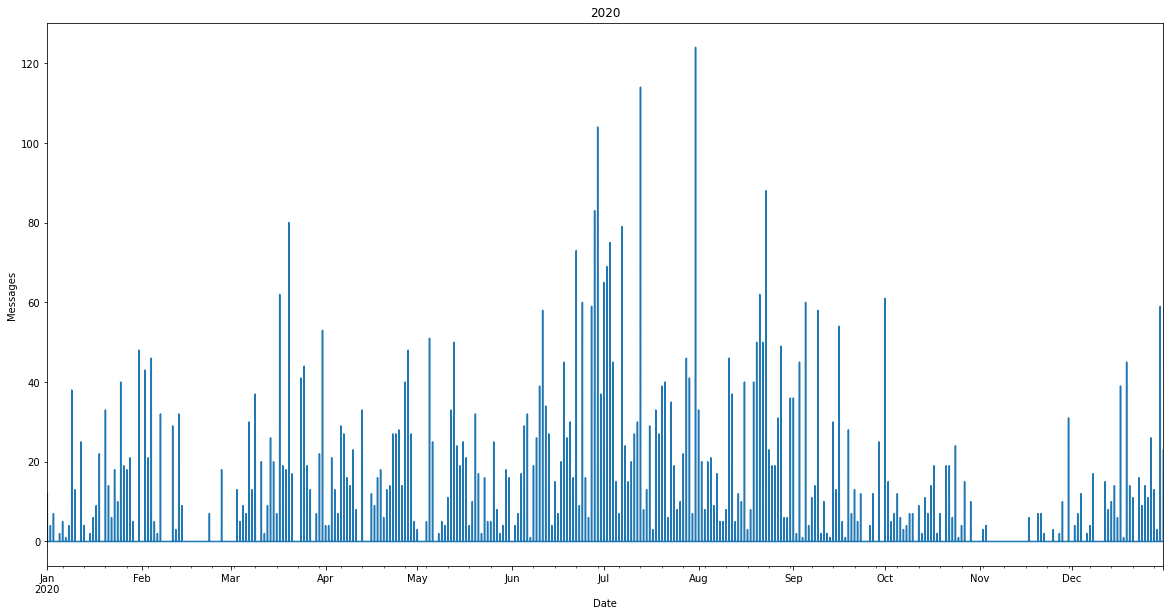

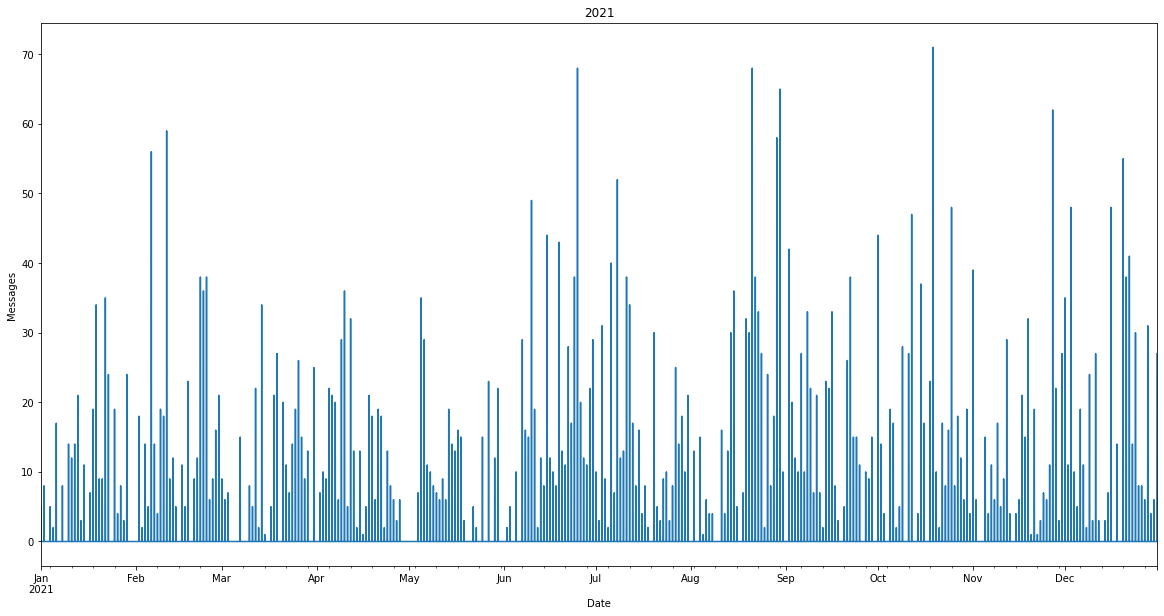

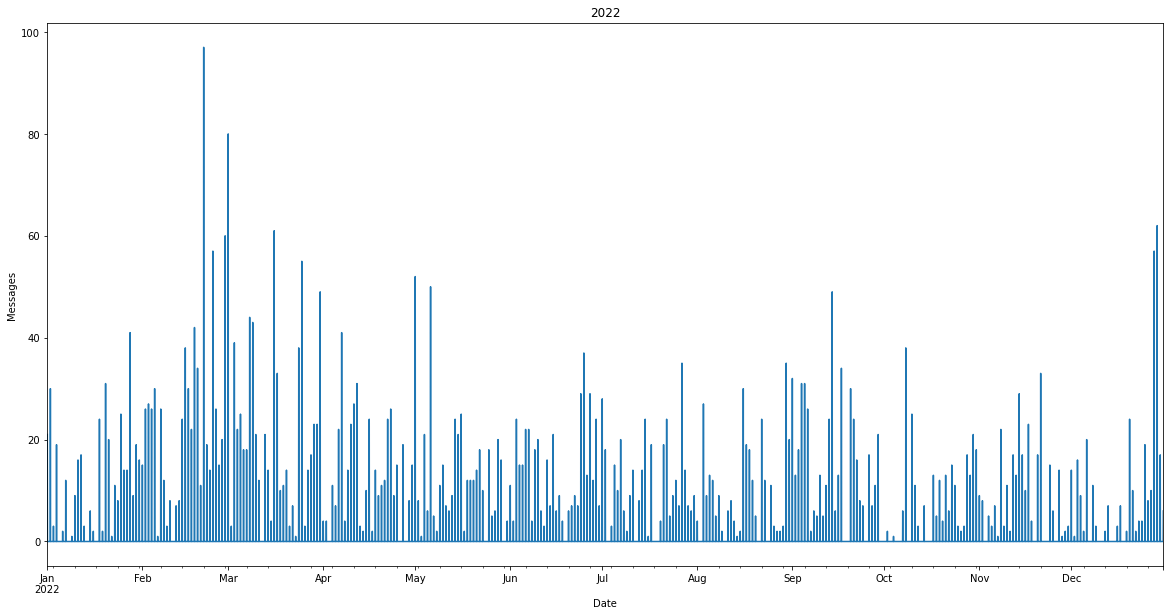

In [117]:
period_plot('2017-01-01','2017-12-31','2017')
period_plot('2018-01-01','2018-12-31','2018')
period_plot('2019-01-01','2019-12-31','2019')
period_plot('2020-01-01','2020-12-31','2020')
period_plot('2021-01-01','2021-12-31','2021')
period_plot('2022-01-01','2022-12-31','2022')


In [104]:
def period_plot_week(start_date,end_date,plot_title):
    # slice the DataFrame with a date range
    df_slice = df_new.loc[start_date:end_date]

    df_slice = df_slice['count'].resample('W').sum()

    # plot the messages density
    fig, ax = plt.subplots(figsize=(20, 10))
    # fig = plt.figure(figsize=(10, 6))
    df_slice.plot(kind='line', ax=ax)

    # set the plot title and axis labels
    ax.set_title('Messages Density')
    ax.set_xlabel('Date')
    ax.set_ylabel('Messages')
    plt.title(plot_title)

    return plt.show()

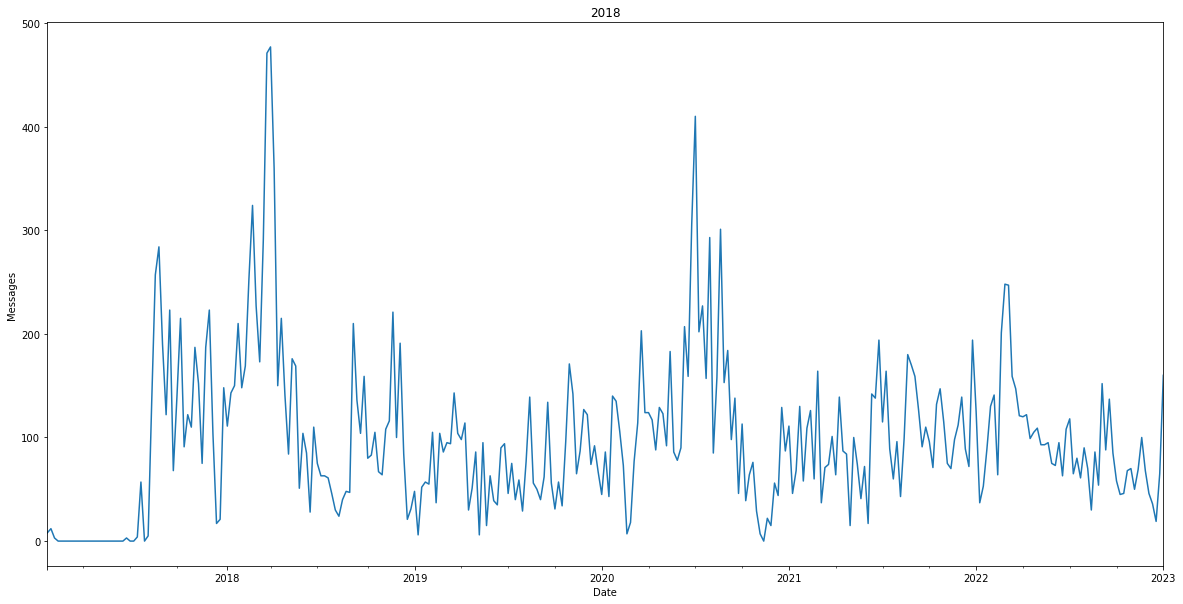

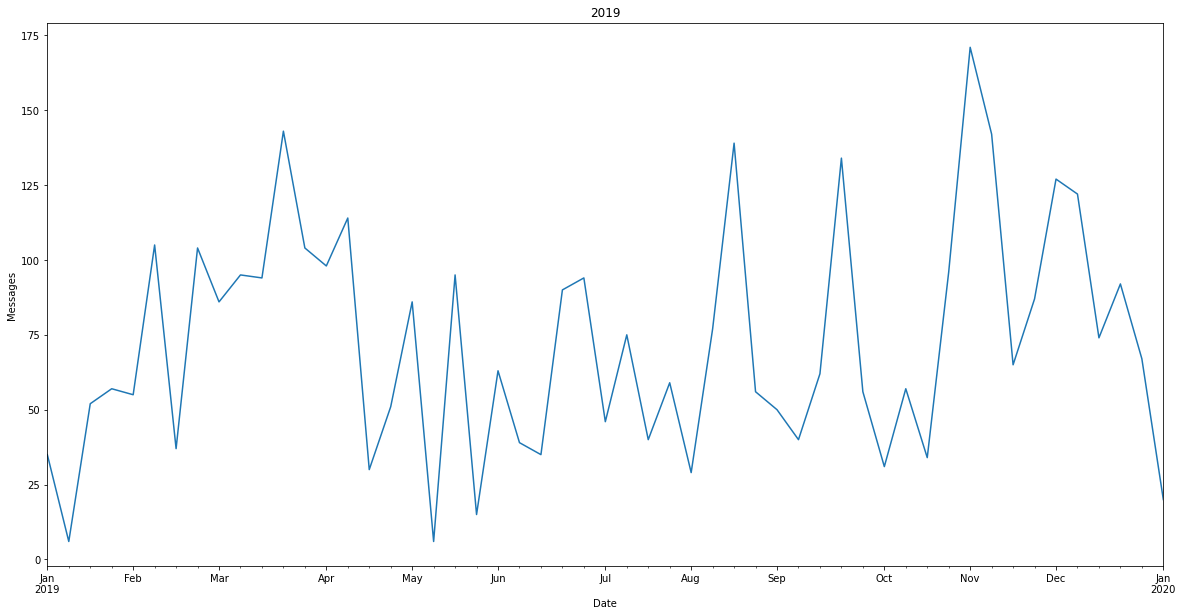

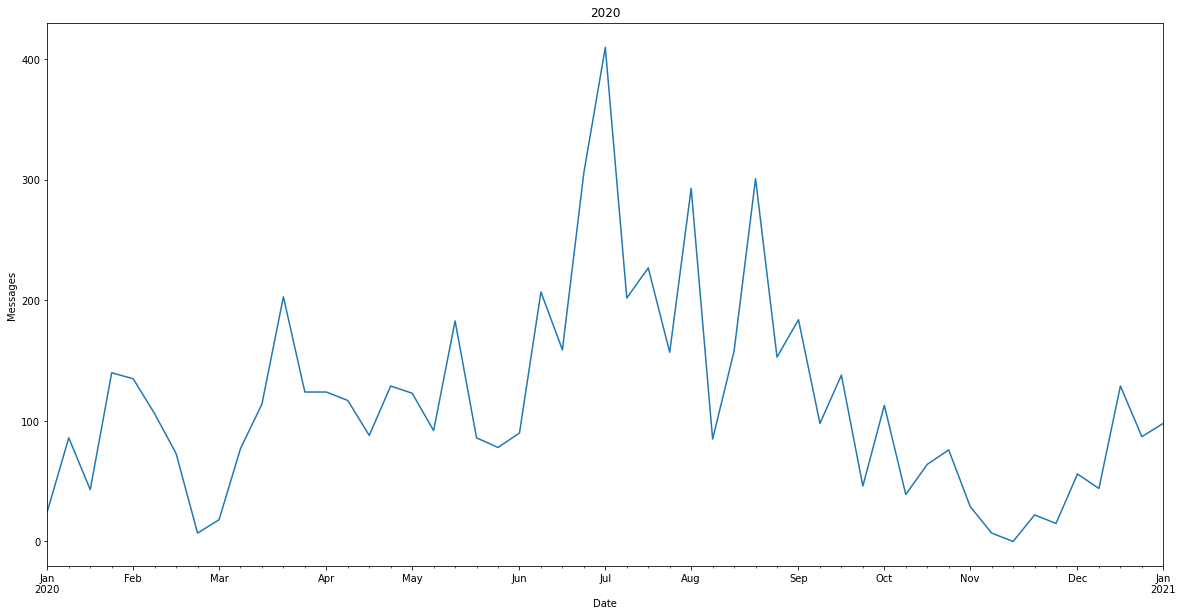

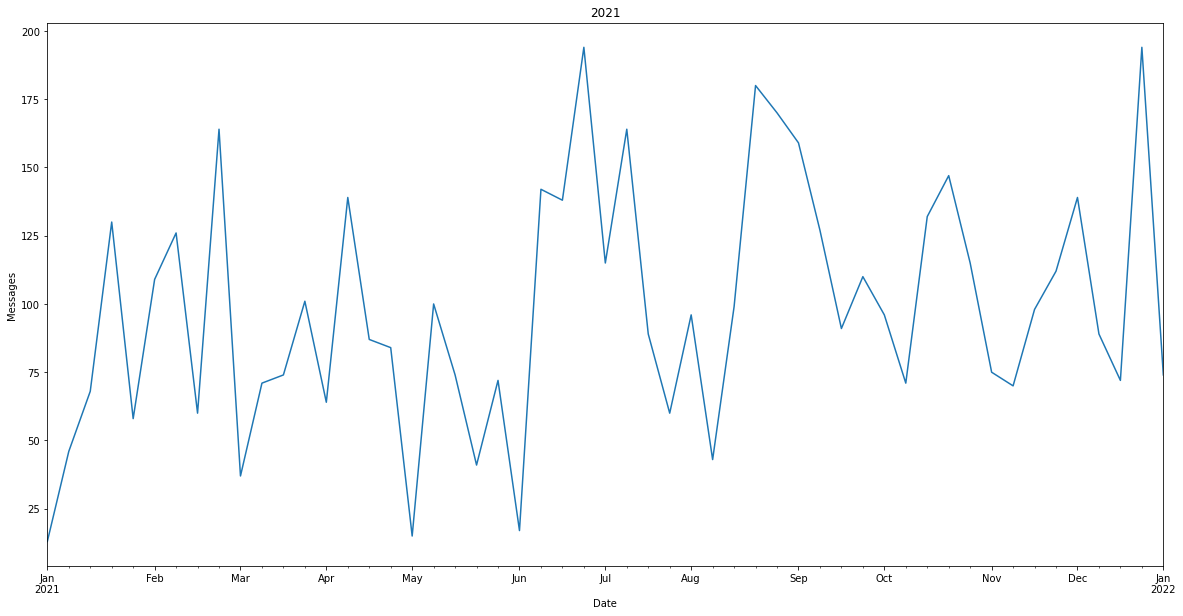

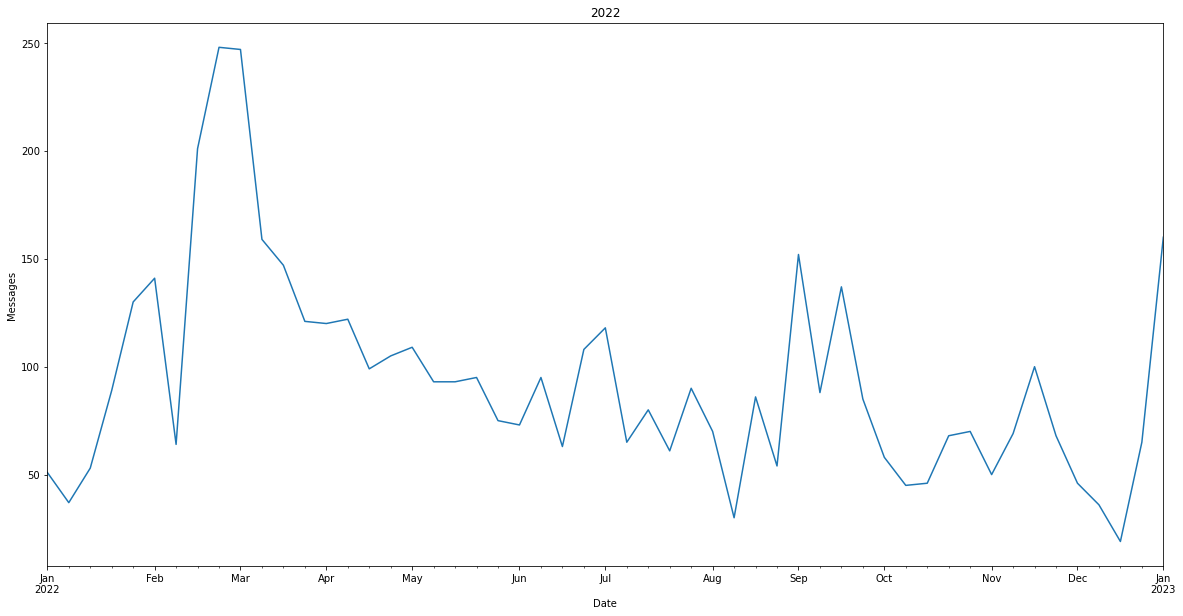

In [116]:
period_plot_week('2017-01-01','2022-12-31','2018')
period_plot_week('2019-01-01','2019-12-31','2019')
period_plot_week('2020-01-01','2020-12-31','2020')
period_plot_week('2021-01-01','2021-12-31','2021')
period_plot_week('2022-01-01','2022-12-31','2022')

In [106]:
def period_plot_week_by_day(start_date,end_date,plot_title):
    # slice the DataFrame with a date range
    df_slice = df_new.loc[start_date:end_date]

    df_slice = df_slice['count'].resample('D').sum()
    # df_slice = df_slice.groupby(df_slice.index.weekday)
    # df_slice = df_slice.groupby(df_slice.index.weekday).size()
    df_slice = df_slice.groupby(df_slice.index.weekday).size()
    # df_slice = df_slice.groupby(df_slice.index.hour).sum()

# plot the messages density

    # plot the messages density
    fig, ax = plt.subplots(figsize=(20, 10))
    # fig = plt.figure(figsize=(10, 6))
    df_slice.plot(kind='bar', ax=ax)

    # set the plot title and axis labels
    ax.set_title('Messages Density')
    ax.set_xlabel('Date')
    ax.set_ylabel('Messages')
    plt.title(plot_title)

    return print(df_slice), plt.show()


date
0    102
1    101
2    101
3    101
4    101
5    101
6    102
Name: count, dtype: int64


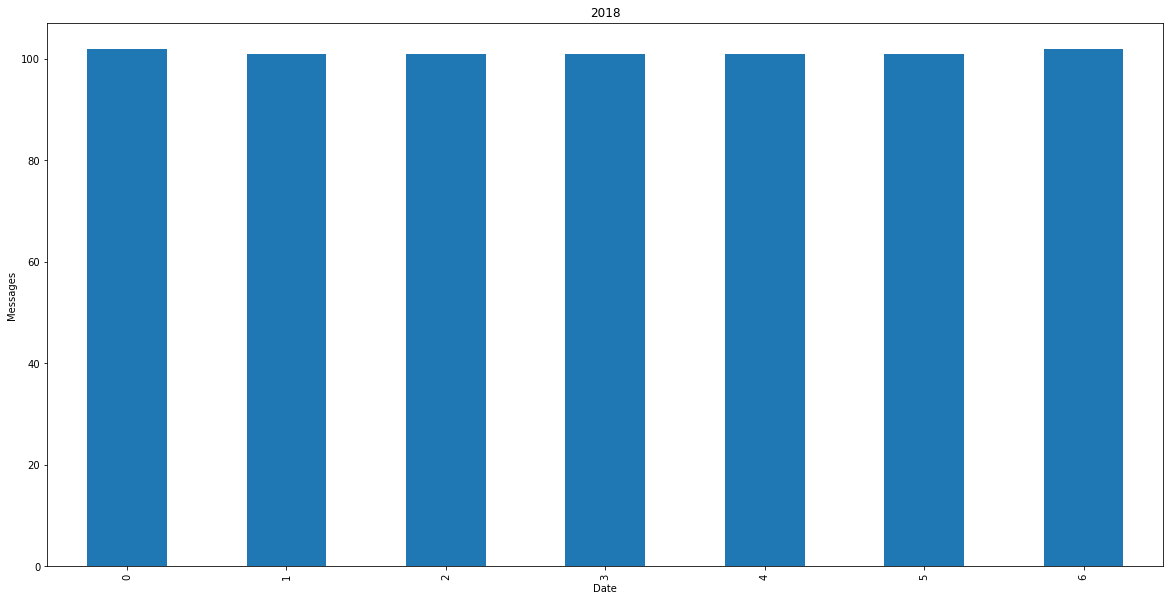

(None, None)

In [107]:
period_plot_week_by_day('2017-01-01','2018-12-31','2018')


In [110]:
def period_plot_week_by_day(start_date,end_date,plot_title):
    # slice the DataFrame with a date range
    df_slice = df_new.loc[start_date:end_date]

    # resample to hourly frequency and sum up messages for each hour
    df_slice = df_slice['count'].resample('H').sum()

    # group the data by hour of the day and sum up the counts
    df_slice = df_slice.groupby(df_slice.index.hour).sum()

    # plot the messages density
    fig, ax = plt.subplots(figsize=(20, 10))
    df_slice.plot(kind='bar', ax=ax)

    # set the plot title and axis labels
    ax.set_title('Messages Density')
    ax.set_xlabel('Hour')
    ax.set_ylabel('Messages')
    plt.title(plot_title)

    return plt.show()






In [111]:
df_new

id     type from                                 text  \
date                                                                   
2016-08-31      1  message    D              лучше б рассказ выложил   
2016-08-31      2  message    P                                  Хмм   
2016-11-23     19  message    P                                        
2016-11-23     20  message    P                  Как будто ты гигант   
2016-11-23     21  message    D                            прикольно   
...           ...      ...  ...                                  ...   
2023-02-14  81205  message    P                                  неа   
2023-02-14  81232  message    P                                        
2023-02-14  81235  message    D                                   ))   
2023-02-14  81237  message    P  Эта объява при входе в школу танцев   
2023-02-14  81238  message    P            Ходил на занятие по танго   

           sticker_emoji forwarded_from  hour  count  \
date                                                   
2016-08-31             0              0     8      1   
2016-08-31             0              0     8      1   
2016-11-23             0              0    22      1   
2016-11-23             0              0    22      1   
2016-11-23             0              0    22      1   
...                  ...            ...   ...    ...   
2023-02-14             0              0    15      1   
2023-02-14             0              0    20      1   
2023-02-14             0              0    20      1   
2023-02-14             0              0    20      1   
2023-02-14             0              0    20      1   

                                                      sent  sent_res  
date                                                                  
2016-08-31  {'result': Sentiment.POSITIVE, 'score': 0.148}  POSITIVE  
2016-08-31  {'result': Sentiment.POSITIVE, 'score': 0.394}  POSITIVE  
2016-11-23   {'result': Sentiment.NEUTRAL, 'score': 0.498}   NEUTRAL  
2016-11-23  {'result': Sentiment.POSITIVE, 'score': 0.133}  POSITIVE  
2016-11-23  {'result': Sentiment.POSITIVE, 'score': 0.175}  POSITIVE  
...                                                    ...       ...  
2023-02-14  {'result': Sentiment.NEGATIVE, 'score': 0.775}  NEGATIVE  
2023-02-14   {'result': Sentiment.NEUTRAL, 'score': 0.498}   NEUTRAL  
2023-02-14   {'result': Sentiment.NEUTRAL, 'score': 0.498}   NEUTRAL  
2023-02-14  {'result': Sentiment.NEGATIVE, 'score': 0.953}  NEGATIVE  
2023-02-14  {'result': Sentiment.POSITIVE, 'score': 0.186}  POSITIVE  

[31138 rows x 10 columns]

In [483]:
df_new

id     type        date from                                 text  \
0          1  message  2016-08-31    D              лучше б рассказ выложил   
1          2  message  2016-08-31    P                                  Хмм   
2         19  message  2016-11-23    P                                        
3         20  message  2016-11-23    P                  Как будто ты гигант   
4         21  message  2016-11-23    D                            прикольно   
...      ...      ...         ...  ...                                  ...   
31133  81205  message  2023-02-14    P                                  неа   
31134  81232  message  2023-02-14    P                                        
31135  81235  message  2023-02-14    D                                   ))   
31136  81237  message  2023-02-14    P  Эта объява при входе в школу танцев   
31137  81238  message  2023-02-14    P            Ходил на занятие по танго   

      sticker_emoji forwarded_from  hour  count  
0                 0              0     8      1  
1                 0              0     8      1  
2                 0              0    22      1  
3                 0              0    22      1  
4                 0              0    22      1  
...             ...            ...   ...    ...  
31133             0              0    15      1  
31134             0              0    20      1  
31135             0              0    20      1  
31136             0              0    20      1  
31137             0              0    20      1  

[31138 rows x 9 columns]

In [112]:
# # only D texts
# df_new_texts_d = df_new[df_new['from']=='D']
# df_new_texts_d

# only P texts
df_new_texts_p = df_new[df_new['from']=='P']
# df_new_texts_p

id     type from                                 text  \
date                                                                   
2016-08-31      2  message    P                                  Хмм   
2016-11-23     19  message    P                                        
2016-11-23     20  message    P                  Как будто ты гигант   
2016-11-23     26  message    P              Я к тому же еще в монче   
2016-12-12    105  message    P                                        
...           ...      ...  ...                                  ...   
2023-02-14  81199  message    P                      ты кофе то пил?   
2023-02-14  81205  message    P                                  неа   
2023-02-14  81232  message    P                                        
2023-02-14  81237  message    P  Эта объява при входе в школу танцев   
2023-02-14  81238  message    P            Ходил на занятие по танго   

           sticker_emoji forwarded_from  hour  count  \
date                                                   
2016-08-31             0              0     8      1   
2016-11-23             0              0    22      1   
2016-11-23             0              0    22      1   
2016-11-23             0              0    22      1   
2016-12-12             0              0     0      1   
...                  ...            ...   ...    ...   
2023-02-14             0              0    14      1   
2023-02-14             0              0    15      1   
2023-02-14             0              0    20      1   
2023-02-14             0              0    20      1   
2023-02-14             0              0    20      1   

                                                      sent  sent_res  
date                                                                  
2016-08-31  {'result': Sentiment.POSITIVE, 'score': 0.394}  POSITIVE  
2016-11-23   {'result': Sentiment.NEUTRAL, 'score': 0.498}   NEUTRAL  
2016-11-23  {'result': Sentiment.POSITIVE, 'score': 0.133}  POSITIVE  
2016-11-23   {'result': Sentiment.POSITIVE, 'score': 0.18}  POSITIVE  
2016-12-12   {'result': Sentiment.NEUTRAL, 'score': 0.498}   NEUTRAL  
...                                                    ...       ...  
2023-02-14   {'result': Sentiment.NEUTRAL, 'score': 0.622}   NEUTRAL  
2023-02-14  {'result': Sentiment.NEGATIVE, 'score': 0.775}  NEGATIVE  
2023-02-14   {'result': Sentiment.NEUTRAL, 'score': 0.498}   NEUTRAL  
2023-02-14  {'result': Sentiment.NEGATIVE, 'score': 0.953}  NEGATIVE  
2023-02-14  {'result': Sentiment.POSITIVE, 'score': 0.186}  POSITIVE  

[15208 rows x 10 columns]

In [113]:
# df_new = df_new_texts_p

text = ' '.join(str(item) for item in df_new['text'] if not isinstance(item, list))
# Очищаем текст с помощью регулярных выражений
text = re.sub(r'==.*?==+', '', text) # удаляем лишние символы
text = text.replace('\n', '') # удаляем знаки разделения на абзацы
# text

'лучше б рассказ выложил Хмм  Как будто ты гигант прикольно надо бы кросы помыть как тиндр?) ни одного лайка? Я к тому же еще в монче    Данила? классно но подтекст? Просто зацепило Бобер охуеннен ты про того, что сидит с Белуши?) или просто отвлеченное рассуждение про зверей Да именно с этим актеришкой второго плана И наверное, Бобер. С большой буквы    еще есть такое? Однажды в США появилась необходимость переместить плавучий док через Панамский канал с Атлантического на Тихоокеанское побережье, но он был слишком широким и не проходил через шлюзы.Тогда его решили переместить, положив его на бок путем затопления в нем определенных отсеков. И переместили. Гениальное описание Концовка звучит как вызов много фотографий И каких но бабка медведева пока лучшая  ну было же Не знал ты оценил музло? Еще нет я пока не слышал визга восторга короче это самое крутое, что открывалось моим ушкам Это же мужик! досирай давай  )))) труба села дико крутой клип ты клипчик оценил? До слез))) книгу дочитал

In [114]:
%matplotlib inline

# Функция для визуализации облака слов
def plot_cloud(wordcloud):
    # Устанавливаем размер картинки
    plt.figure(figsize=(40, 30))
    # Показать изображение
    plt.imshow(wordcloud)
    # Без подписей на осях
    plt.axis("off")

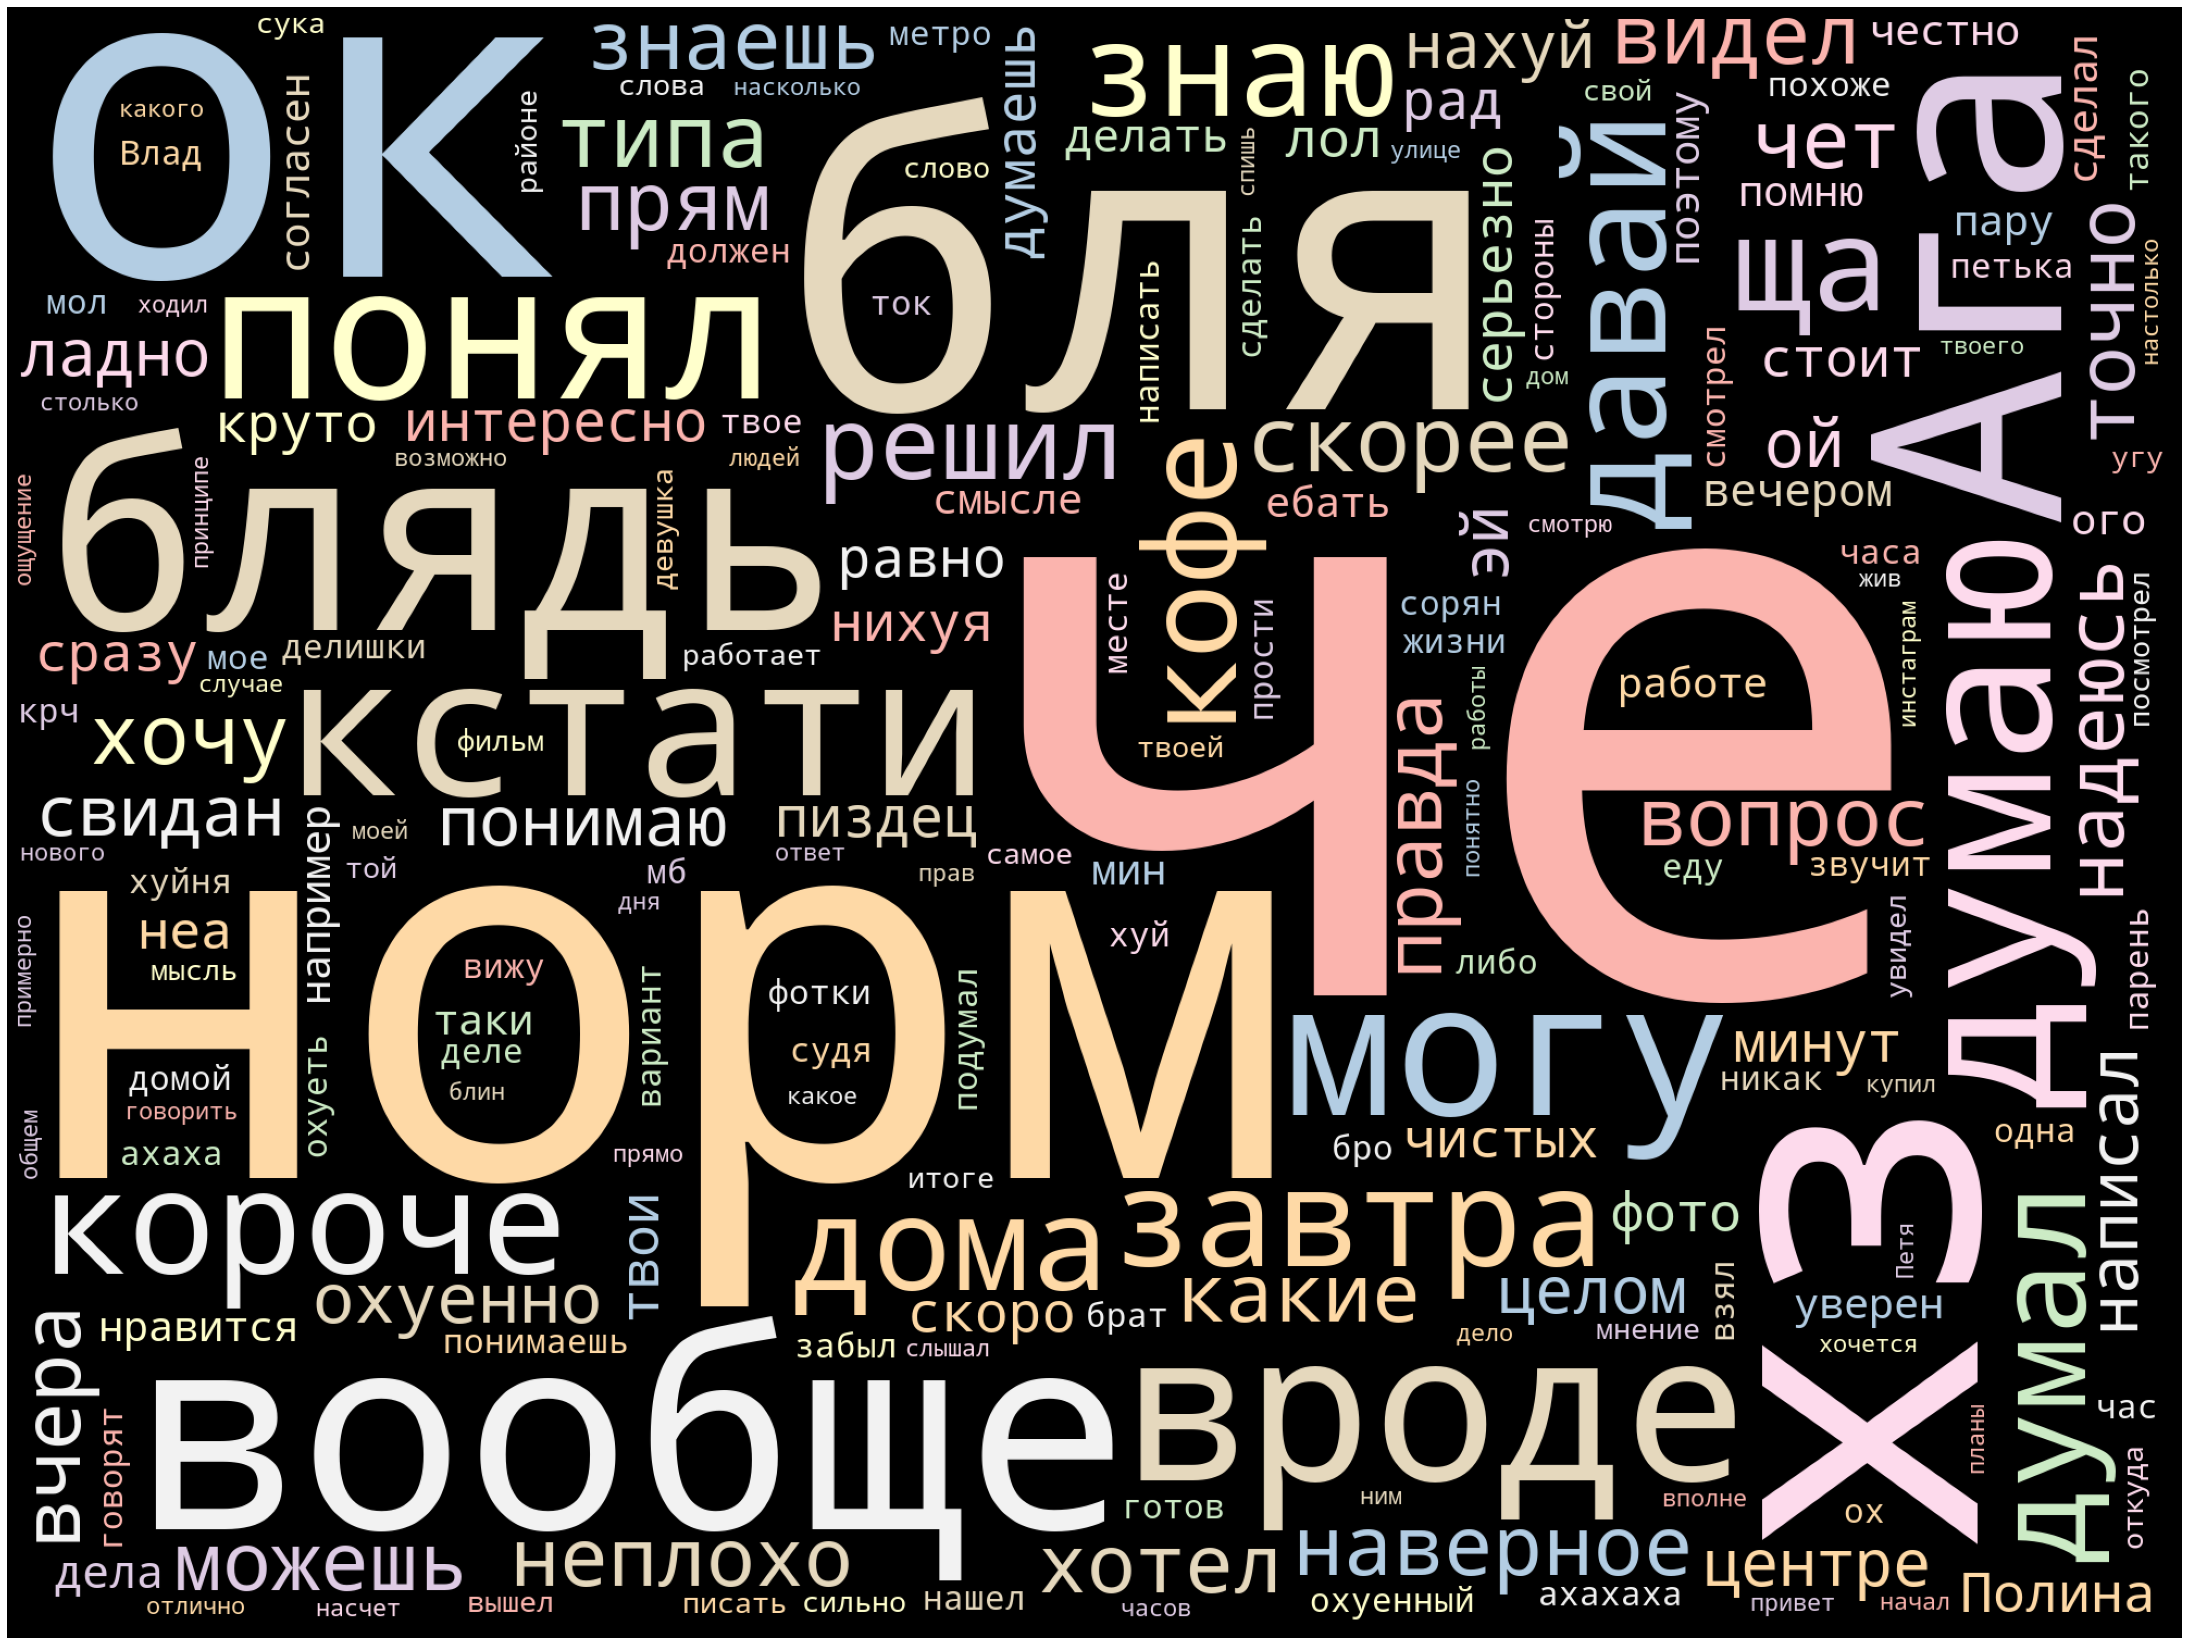

In [115]:
# Импортируем инструменты для облака слов и списки стоп-слов
from wordcloud import WordCloud
from stop_words import get_stop_words

# Записываем в переменную стоп-слова русского языка
STOPWORDS_RU = get_stop_words('russian')

# Генерируем облако слов
wordcloud = WordCloud(width = 2000,
                      height = 1500,
                      # random_state=1,
                      background_color='black',
                      margin=20,
                      colormap='Pastel1',
                      collocations=False,
                      stopwords = STOPWORDS_RU).generate(text)

# Рисуем картинку
plot_cloud(wordcloud)

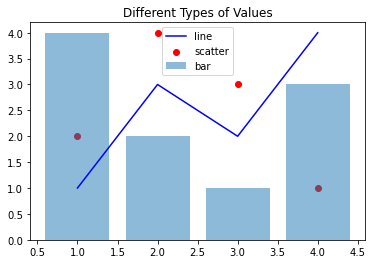

In [461]:
import matplotlib.pyplot as plt

# create some sample data
x = [1, 2, 3, 4]
y1 = [1, 3, 2, 4]
y2 = [2, 4, 3, 1]
y3 = [4, 2, 1, 3]

# create the plot
plt.plot(x, y1, 'b-', label='line')
plt.scatter(x, y2, c='r', marker='o', label='scatter')
plt.bar(x, y3, alpha=0.5, label='bar')

# add title and legend
plt.title('Different Types of Values')
plt.legend(loc='best')

# show the plot
plt.show()